# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
X = df[['YearsExperience']]
y = df['Salary']

In [5]:
lin_reg = LinearRegression()

In [6]:
lin_reg.fit(X, y)

LinearRegression()

In [7]:
lin_reg.score(X,y)

0.9569566641435086

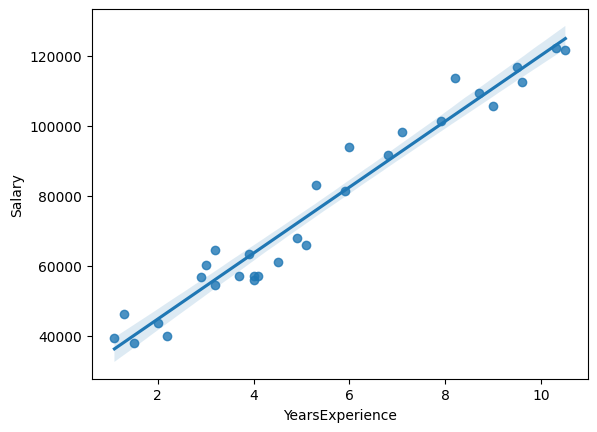

In [8]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [9]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
(X-X.min())/(X.max()-X.min())# minmax scaler

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [13]:
(X -X.mean())/X.std()# standar scaler

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
minmax = MinMaxScaler()
minmax.fit(X)# con esto cogemos el máximo y el mínimo
minmax.transform(X)# con esto aplicamos la función de minmax scaler


array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [16]:
standar = StandardScaler()
standar.fit(X)# con esto cogemos la media y la desviación estandar
standar.transform(X)# con esto aplicamos la fórmula de standar scaler

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [19]:
lin_reg.score(X,y)

0.6690412331929895

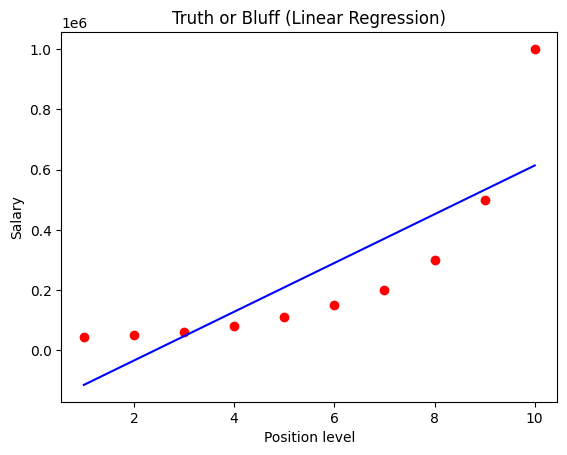

In [20]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

C:\Users\Victor\AppData\Local\Temp\ipykernel_17964\4008593066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y - lin_reg.predict(X));


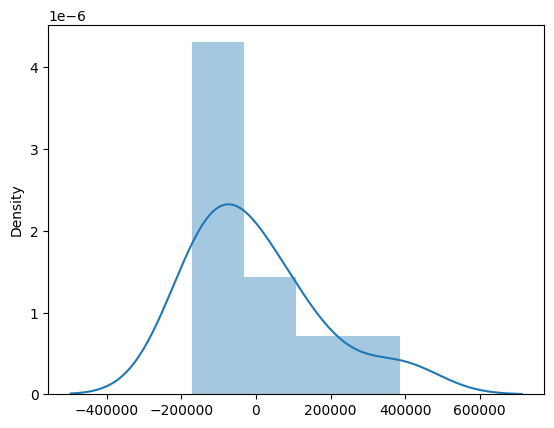

In [21]:
sns.distplot(y - lin_reg.predict(X));

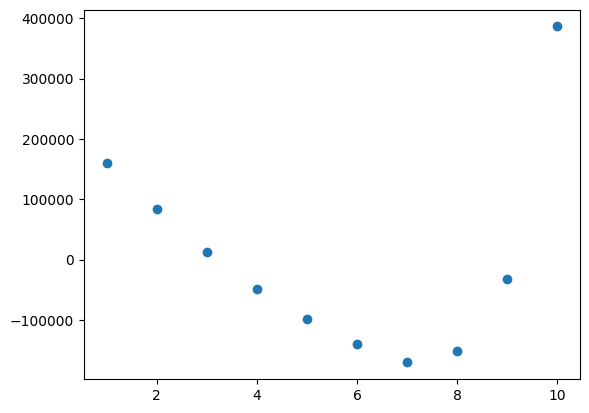

In [22]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [23]:
feats = pd.DataFrame({"a": [1,2,3,4,5,6,7], "b":[10, 20, 30 ,40 , 50, 60, 70]})
feats

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(feats)# aquí el fit no hace nada, pero es imprescindible hacerlo por como funcionan los transform y los predict
pd.DataFrame(poly_feats.transform(feats))

,0,1,2,3,4,5
0,1.0,1.0,10.0,1.0,10.0,100.0
1,1.0,2.0,20.0,4.0,40.0,400.0
2,1.0,3.0,30.0,9.0,90.0,900.0
3,1.0,4.0,40.0,16.0,160.0,1600.0
4,1.0,5.0,50.0,25.0,250.0,2500.0
5,1.0,6.0,60.0,36.0,360.0,3600.0
6,1.0,7.0,70.0,49.0,490.0,4900.0


In [59]:
feats

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [16]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1, 10):
    poly_feats = PolynomialFeatures(degree = degree)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    score = pol_reg.score(X_poly, y)
    print(f"Para el degree {degree}, el score es de: {score}")
    

Para el degree 1, el score es de: 0.6690412331929895
Para el degree 2, el score es de: 0.9162082221443943
Para el degree 3, el score es de: 0.9812097727913367
Para el degree 4, el score es de: 0.9973922891706614
Para el degree 5, el score es de: 0.9997969027099755
Para el degree 6, el score es de: 0.9999494749253776
Para el degree 7, el score es de: 0.9999770143729168
Para el degree 8, el score es de: 0.9999934972438327
Para el degree 9, el score es de: 0.9999999999999479


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [18]:
X_poly2 = X_poly[:, 2:3]

In [33]:
X_poly3 = X_poly[:,3:4]

In [36]:
X_poly4 = X_poly[:,4:5]

In [37]:
X_poly4

array([[1.000e+00],
       [1.600e+01],
       [8.100e+01],
       [2.560e+02],
       [6.250e+02],
       [1.296e+03],
       [2.401e+03],
       [4.096e+03],
       [6.561e+03],
       [1.000e+04]])

In [42]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [43]:
pol_reg.score(X_poly, y)

0.9973922891706614

`x^0 + x^1 + x^2 + x^3 + x^4 `

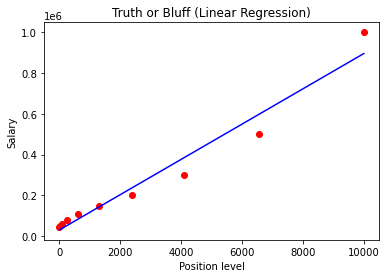

In [40]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_poly4, y, color='red')
    plt.plot(X_poly4, pol_reg.predict(X_poly4), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [32]:
pol_reg.score(X_poly,y)

0.9812097727913367

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [49]:
print(lin_reg.predict([[7.3]]))

[395081.81818182]


In [50]:
print(pol_reg.predict(poly_feats.transform([[7.3]])))

[213110.8916084]


In [44]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [45]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

In [52]:
X_train

array([[   1.,    6.,   36.,  216.],
       [   1.,    1.,    1.,    1.],
       [   1.,    8.,   64.,  512.],
       [   1.,    3.,    9.,   27.],
       [   1.,   10.,  100., 1000.],
       [   1.,    5.,   25.,  125.],
       [   1.,    4.,   16.,   64.],
       [   1.,    7.,   49.,  343.]])

In [50]:
X_test

array([[  1.,   9.,  81., 729.],
       [  1.,   2.,   4.,   8.]])

In [51]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
predictions = pol_reg.predict(X_test)

In [54]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,606335.600512,500000
1,84934.891292,50000


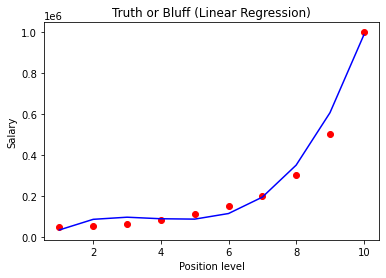

In [55]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [56]:
from sklearn.metrics import r2_score
r2_score(pol_reg.predict(X_test), y_test)

0.9078366328882951